In [6]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std

In [7]:
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    # generate dataset
    X, Y = make_regression(n_samples=1000, n_features=20,
                          noise=0.1, random_state=1)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainY, testY = Y[:n_train], Y[n_train:]
    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)
        # transform training dataset
        trainX = input_scaler.transform(trainX)
        # trainsform test dataset
        testX = input_scaler.transform(testX)
    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        trainY = trainY.reshape(len(trainY), 1)
        testY = testY.reshape(len(testY), 1)
        # fit scaler on training dataset
        output_scaler.fit(trainY)
        # transform training dataset
        trainY = output_scaler.transform(trainY)
        # transform test dataset
        testY = output_scaler.transform(testY)
    return trainX, trainY, testX, testY

In [8]:
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainY, testX, testY):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=20, activation='relu',
                   kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
    # fit model
    model.fit(trainX, trainY, epochs=100, verbose=0)
    # evaluate the model
    test_mse = model.evaluate(testX, testY, verbose=0)
    return test_mse

In [9]:
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(name, input_scaler, output_scaler, n_repeats=30):
    print(name)
    # get dataset
    trainX, trainY, testX, testY = get_dataset(input_scaler, output_scaler)
    # repeated evaluation of model
    results = list()
    for i in range(n_repeats):
        test_mse = evaluate_model(trainX, trainY, testX, testY)
        print('%d) %.3f' % (i, test_mse))
        results.append(test_mse)
    return results

In [10]:
# unscaled inputs
results_unscaled_inputs = repeated_evaluation('Unscaled Inputs', None,
                                              StandardScaler())
print('----------------------------------------')
# normalized inputs
results_normalized_inputs = repeated_evaluation('Normalized Inputs',
                                                MinMaxScaler(),
                                                StandardScaler())
print('----------------------------------------')
# standardized inputs
results_standardized_inputs = repeated_evaluation('Standardized Inputs',
                                                  StandardScaler(),
                                                  StandardScaler())

Unscaled Inputs
0) 0.005
1) 0.009
2) 0.005
3) 0.001
4) 0.006
5) 0.004
6) 0.008
7) 0.005
8) 0.006
9) 0.000
10) 0.006
11) 0.009
12) 0.002
13) 0.005
14) 0.012
15) 0.007
16) 0.009
17) 0.001
18) 0.010
19) 0.000
20) 0.006
21) 0.006
22) 0.010
23) 0.008
24) 0.006
25) 0.011
26) 0.012
27) 0.011
28) 0.011
29) 0.007
----------------------------------------
Normalized Inputs
0) 0.000
1) 0.000
2) 0.000
3) 0.001
4) 0.000
5) 0.001
6) 0.000
7) 0.000
8) 0.000
9) 0.000
10) 0.000
11) 0.001
12) 0.000
13) 0.000
14) 0.000
15) 0.001
16) 0.001
17) 0.000
18) 0.000
19) 0.000
20) 0.000
21) 0.000
22) 0.001
23) 0.000
24) 0.001
25) 0.001
26) 0.000
27) 0.001
28) 0.000
29) 0.000
----------------------------------------
Standardized Inputs
0) 0.001
1) 0.007
2) 0.007
3) 0.004
4) 0.008
5) 0.009
6) 0.010
7) 0.001
8) 0.007
9) 0.008
10) 0.005
11) 0.008
12) 0.005
13) 0.006
14) 0.009
15) 0.011
16) 0.008
17) 0.009
18) 0.010
19) 0.004
20) 0.004
21) 0.008
22) 0.011
23) 0.012
24) 0.010
25) 0.011
26) 0.008
27) 0.000
28) 0.009
29) 

In [11]:
# Unscaled
mean(results_unscaled_inputs)

0.006561427395235902

In [12]:
std(results_unscaled_inputs)

0.0032970304003999335

In [13]:
# Normalized
mean(results_normalized_inputs)

0.0004515104111133648

In [14]:
std(results_normalized_inputs)

0.00027831408021146545

In [15]:
# Standardized
mean(results_standardized_inputs)

0.007385740485057855

In [16]:
std(results_standardized_inputs)

0.0032749586398413163

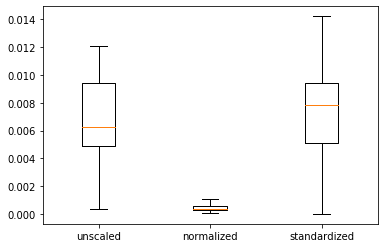

In [17]:
# plot results
results = [
    results_unscaled_inputs,
    results_normalized_inputs,
    results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()